In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-payment-fraud-detection/onlinefraud.csv
/kaggle/input/d/whenamancodes/fraud-detection/creditcard.csv


In the above block we imported all the neccessary library for this task


Now we will read the dataset

In [60]:
transactions=pd.read_csv("/kaggle/input/online-payment-fraud-detection/onlinefraud.csv")
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Lets filter out transations that is less than 1000

In [62]:
transactions=transactions[transactions["amount"]>=1000].reset_index()

Getting number of fraud transactions

In [64]:

print(f"In the given dataset there are {transactions.isFraud.sum()} fraud transactions")

In the given dataset there are 8155 fraud transactions


Getting the percentage

In [65]:
fraud=transactions[transactions["isFraud"]==1].shape[0]
total=transactions.shape[0]
print(f"The percentage of fraud transactions to total transactions {fraud*100/total}")

The percentage of fraud transactions to total transactions 0.13110978849121332


number of null in given dataset

In [66]:
transactions.isnull().sum().sum()


0

There are no null values in the given dataset so no need of datacleaning

In [67]:
transactions.describe()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.219978e+06,6.219978e+06,6.219978e+06,6.219978e+06,6.219978e+06,6.219978e+06,6.219978e+06,6.219978e+06,6.219978e+06
mean,3.182688e+06,2.434813e+02,1.839751e+05,8.483964e+05,8.701205e+05,1.122013e+06,1.249103e+06,1.311098e-03,2.572356e-06
std,1.836947e+06,1.422775e+02,6.101249e+05,2.912526e+06,2.948735e+06,3.430518e+06,3.708324e+06,3.618534e-02,1.603855e-03
min,0.000000e+00,1.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590795e+06,1.560000e+02,1.480247e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.184560e+06,2.390000e+02,7.997907e+04,1.435300e+04,0.000000e+00,1.504490e+05,2.331819e+05,0.000000e+00,0.000000e+00
75%,4.773847e+06,3.350000e+02,2.125857e+05,1.081230e+05,1.479943e+05,9.729657e+05,1.144827e+06,0.000000e+00,0.000000e+00
max,6.362619e+06,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [68]:
print(f"ratio of fraud to not fraud {fraud}:{total-fraud}")

ratio of fraud to not fraud 8155:6211823


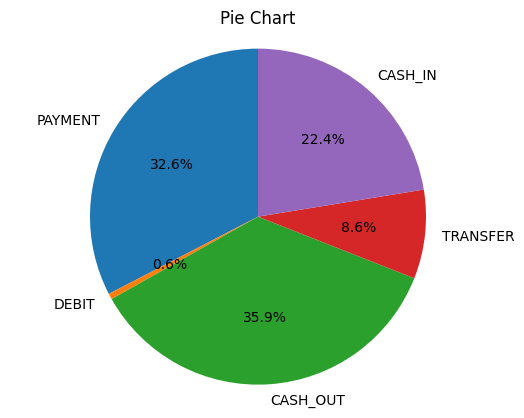

In [77]:
import collections
data = transactions.type
counts = collections.Counter(data)
labels = counts.keys()
sizes = counts.values()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 

plt.title("Pie Chart")
plt.show()